Generation 1, Best Fitness: 0.00115
Generation 2, Best Fitness: 0.00111
Generation 3, Best Fitness: 0.00111
Generation 4, Best Fitness: 0.00115
Generation 5, Best Fitness: 0.00114
Generation 6, Best Fitness: 0.00115
Generation 7, Best Fitness: 0.00116
Generation 8, Best Fitness: 0.00116
Generation 9, Best Fitness: 0.00117
Generation 10, Best Fitness: 0.00117
Generation 11, Best Fitness: 0.00118
Generation 12, Best Fitness: 0.00117
Generation 13, Best Fitness: 0.00116
Generation 14, Best Fitness: 0.00118
Generation 15, Best Fitness: 0.00117
Generation 16, Best Fitness: 0.00114
Generation 17, Best Fitness: 0.00114
Generation 18, Best Fitness: 0.00113
Generation 19, Best Fitness: 0.00113
Generation 20, Best Fitness: 0.00111
Generation 21, Best Fitness: 0.00125
Generation 22, Best Fitness: 0.00113
Generation 23, Best Fitness: 0.00114
Generation 24, Best Fitness: 0.00118
Generation 25, Best Fitness: 0.00118
Generation 26, Best Fitness: 0.00115
Generation 27, Best Fitness: 0.00116
Generation

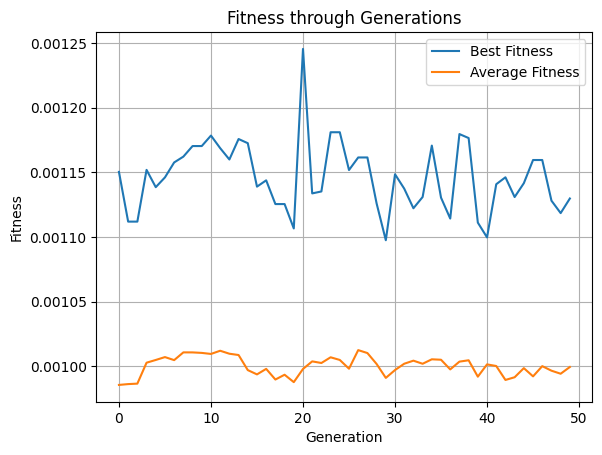

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
CITY_SIZE = 30
NUM_HOMES = 60
POPULATION_SIZE = 100
NUM_GENERATIONS = 50
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8

WAREHOUSE_A = (8, 4)
WAREHOUSE_B = (26, 28)

# Generate homes' locations
homes = [(random.randint(0, CITY_SIZE), random.randint(0, CITY_SIZE)) for _ in range(NUM_HOMES)]

# Functions for genetic algorithm
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def total_route_distance(warehouse, route):
    total_distance = calculate_distance(warehouse, homes[route[0]])
    for i in range(len(route) - 1):
        total_distance += calculate_distance(homes[route[i]], homes[route[i + 1]])
    total_distance += calculate_distance(homes[route[-1]], warehouse)
    return total_distance

def evaluate_fitness(routes):
    distance_A = total_route_distance(WAREHOUSE_A, routes[:NUM_HOMES // 2])
    distance_B = total_route_distance(WAREHOUSE_B, routes[NUM_HOMES // 2:])
    return 1 / (distance_A + distance_B)

def select_parents(fitness):
    return random.choices(range(POPULATION_SIZE), weights=fitness, k=2)

def crossover(parent1, parent2):
    child = parent1.copy()
    if random.random() < CROSSOVER_RATE:
        idx = range(NUM_HOMES // 2)
        subset = set(parent2[i] for i in random.sample(idx, k=len(idx) // 2))
        child = [i if i not in subset else -1 for i in parent1]
        filler = (i for i in parent2 if i in subset)
        child = [i if i != -1 else next(filler) for i in child]
    return child

def mutate(route):
    if random.random() < MUTATION_RATE:
        i, j = random.sample(range(NUM_HOMES), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Initialize the population
population = [random.sample(range(NUM_HOMES), k=NUM_HOMES) for _ in range(POPULATION_SIZE)]

best_fitness_history = []
avg_fitness_history = []

# Start the generations loop
for generation in range(NUM_GENERATIONS):
    fitness = [evaluate_fitness(individual) for individual in population]

    new_population = []
    for _ in range(POPULATION_SIZE):
        parents = select_parents(fitness)
        child = crossover(population[parents[0]], population[parents[1]])
        child = mutate(child)
        new_population.append(child)

    population = new_population

    # Record the fitness history
    best_fitness_history.append(max(fitness))
    avg_fitness_history.append(sum(fitness) / POPULATION_SIZE)

    print(f"Generation {generation + 1}, Best Fitness: {best_fitness_history[-1]:.5f}")

# Plot the fitness history
plt.figure()
plt.plot(best_fitness_history, label='Best Fitness')
plt.plot(avg_fitness_history, label='Average Fitness')
plt.title('Fitness through Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid()
plt.show()
